# 1. Loading libraries

In [2]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

# 2. Defining functions:

## 2.1: Loading images:

In [3]:
def load_image(image_path, image_size=(512, 256)):
    img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

## 2.2: Visualizing images:

In [8]:
def visualize(images, titles=('',)):
    noi = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w  * noi, w))
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    
    for i in range(noi):
        plt.subplot(grid_look[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i])
        plt.savefig("final.jpg")
    plt.show()

## 2.3: Trying:

In [5]:
original_image = load_image("Neural_Style_Transfer\original_image.jpg")
style_image = load_image("Neural_Style_Transfer\style_image.jpg")

##  2.4: Training our neural netowrk model:

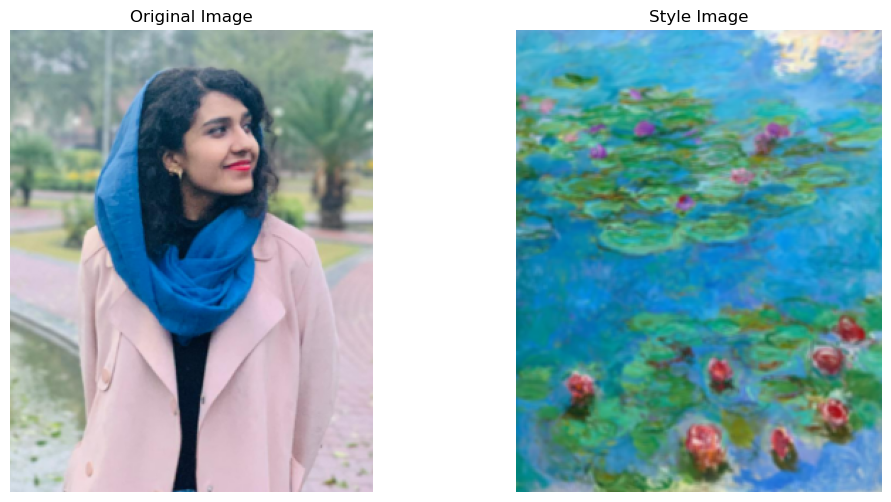

In [7]:
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='VALID')
visualize([original_image, style_image], ['Original Image - Sanha', 'Style Image - Monet'])

## What's going on?

We will define and then load the TensorFlow hub model that we want to use in this step. The model that we will use is called Arbitrary Image Stylization. There are different ways of loading a model, one can be loading throught the url or downloading the model folder.

In [9]:
stylize_model = tf_hub.load('..\..\General-Code-Data\magenta_arbitrary-image-stylization-v1-256_2')

In [12]:
results = stylize_model(tf.constant(original_image), tf.constant(style_image))
stylized_image = results[0]

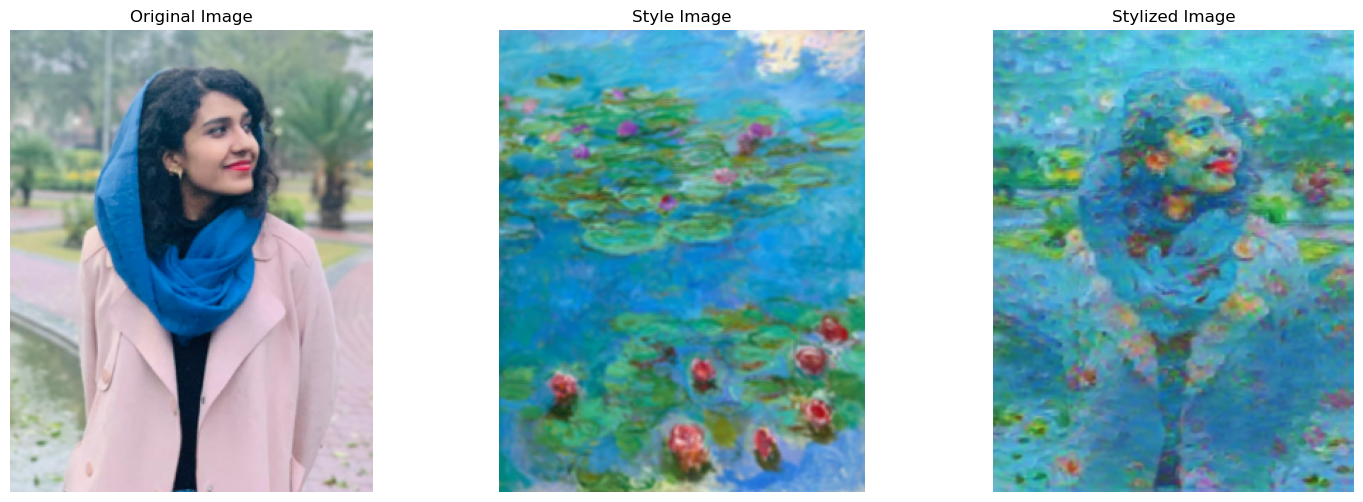

In [13]:
visualize([original_image, style_image, stylized_image], 
          titles=['Original Image', 'Style Image', 'Stylized Image'])

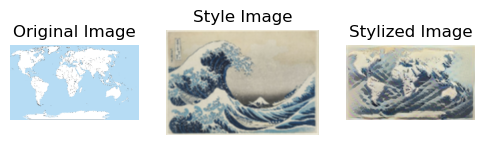

In [16]:
## Trying another:

original_image2 = load_image("Neural_Style_Transfer\original_image2.jpg")
style_image2 = load_image("Neural_Style_Transfer\style_image2.jpg")
style_image2 = tf.nn.avg_pool(style_image2, ksize=[3,3], strides=[1,1], padding='VALID')
# stylize_model2 = tf_hub.load('..\..\General-code-data\tf_model')
results2 = stylize_model(tf.constant(original_image2), tf.constant(style_image2))
stylized_image2 = results2[0]
visualize([original_image2, style_image2, stylized_image2 ], 
          titles=['Original Image', 'Style Image', 'Stylized Image'])

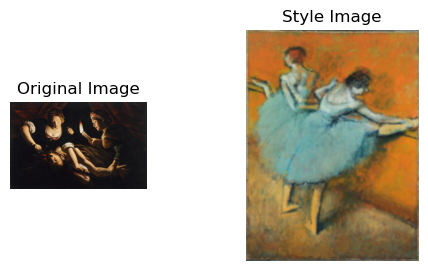

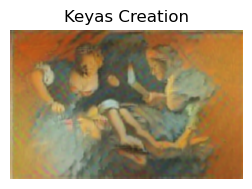

In [20]:
## Trying another:

original_image4 = load_image("Neural_Style_Transfer\original_image4.jpg")
style_image4 = load_image("Neural_Style_Transfer\style_image4.jpg")
style_image4 = tf.nn.avg_pool(style_image4, ksize=[3,3], strides=[1,1], padding='VALID')
# stylize_model2 = tf_hub.load('..\..\General-code-data\tf_model')
results4 = stylize_model(tf.constant(original_image4), tf.constant(style_image4))
stylized_image4 = results4[0]
visualize([original_image4, style_image4], 
          titles=['Original Image', 'Style Image'])
visualize([stylized_image4], titles = ['Keyas Creation'])